***
# Rozwiązywanie układów równań liniowych
***
## Mateusz Powęska
***
## Zadanie 1 Metoda Gaussa-Jordana
***

In [198]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
import time

<ipython-input-199-eed9de0c7e21>:50: DeprecationWarning: This function is deprecated. Please call randint(-100, 100 + 1) instead
  matrix = np.random.random_integers(-100, 100, (i, i + 1)).astype(float)


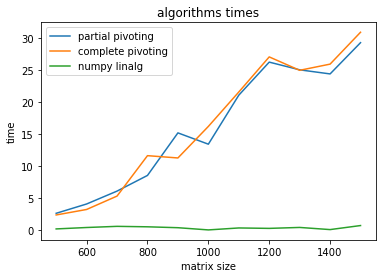

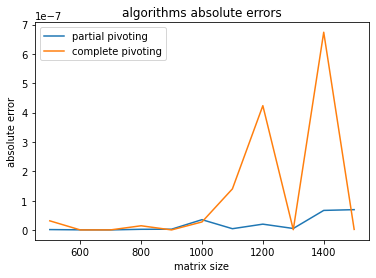

In [199]:
def partial_pivoting(n, matrix):
    copy_abs = np.absolute(np.copy(matrix))
    for i in range(n):
        idx = np.where(copy_abs == np.amax(copy_abs[i:, i], axis=0))[0][0]
        if i != idx:
            matrix[[i, idx]] = matrix[[idx, i]]


def complete_pivoting(n, matrix):
    copy_abs = np.absolute(np.copy(matrix))
    for i in range(n):
        idx = np.where(copy_abs == np.amax(copy_abs[i:, i:n]))
        if idx[0][0] != i:
            matrix[[i, idx[0][0]]] = matrix[[idx[0][0], i]]
        if idx[1][0] != i:
            matrix[:, [i, idx[0][0]]] = matrix[:, [idx[0][0], i]]


def gauss_jordan(matrix, method):
    pivoting = {"partial pivoting": partial_pivoting, "complete pivoting": complete_pivoting}
    n = len(matrix)

    pivoting[method](n, matrix)

    for i in range(n):
        if matrix[i][i] == 0:
            sys.exit('Divide by zero detected!')
        for j in range(n):
            if i != j:
                coff = matrix[j][i] / matrix[i][i]
                matrix[j] -= coff * matrix[i]

    return np.array([matrix[i][n] / matrix[i][i] for i in range(n)], float)


def absolute_error(expected, result):
    return abs(sum(abs(expected[i] - result[i]) for i in range(len(result)))) / abs(sum(expected))


def calculate(matrix, method):
    start_time = time.time()
    result_partial = gauss_jordan(matrix, method)
    end_time = time.time()
    return end_time - start_time, result_partial


def test():
    plot_stats = [[] for _ in range(6)]
    for i in range(500, 1501, 100):
        matrix = np.random.random_integers(-100, 100, (i, i + 1)).astype(float)
        copy_1 = np.copy(matrix)
        copy_2 = np.copy(matrix)

        start_time = time.time()
        last_column = copy_1[:, i]
        copy_1 = np.delete(copy_1, -1, axis=1)
        expected = np.linalg.solve(copy_1, last_column)
        end_time = time.time()
        plot_stats[2].append(end_time - start_time)

        partial = calculate(matrix, "partial pivoting")
        plot_stats[0].append(partial[0])
        plot_stats[3].append(absolute_error(sorted(expected), sorted(partial[1])))

        complete = calculate(copy_2, "complete pivoting")
        plot_stats[1].append(complete[0])

        plot_stats[4].append(absolute_error(sorted(expected), sorted(complete[1])))
        plot_stats[5].append(i)

    return plot_stats


def prepare_charts(result_array):
    _, ax = plt.subplots()
    ax.plot(result_array[5], result_array[0], label="partial pivoting")
    ax.plot(result_array[5], result_array[1], label="complete pivoting")
    ax.plot(result_array[5], result_array[2], label="numpy linalg")
    plt.title("algorithms times")
    plt.xlabel("matrix size")
    plt.ylabel("time")
    plt.legend()
    plt.show()

    _, ax = plt.subplots()
    ax.plot(result_array[5], result_array[3], label="partial pivoting")
    ax.plot(result_array[5], result_array[4], label="complete pivoting")
    plt.title("algorithms absolute errors")
    plt.xlabel("matrix size")
    plt.ylabel("absolute error")
    plt.legend()
    plt.show()


array = test()
prepare_charts(array)


Na pierwszym wykresie widać, że czas dla wersji "complete pivotinig" jest nieznacznie większy od "partial pivoting", natomiast dla funkcji bibliotecznej linalg czas pozostaje stały.
Błędy bezwględne dla tych dwóch wersji bardzo małe - rzędu 10^(-70 i zależy to od liczb w macierzy.

***
## Zadanie 2 Faktoryzacja LU
***

In [179]:
def lu_decomposition(matrix):
    n = len(matrix)

    for i in range(n):
        if matrix[i][i] == 0:
            sys.exit('Divide by zero detected!')
        for j in range(i, n):
            temp = 0
            for k in range(i):
                temp += matrix[i][k] * matrix[k][j]
            matrix[i][j] -= temp

            temp = 0
            if i == j: continue
            for k in range(i):
                if j == k == i:
                    temp += matrix[k][i]
                else:
                    temp += matrix[j][k] * matrix[k][i]
            matrix[j][i] = (matrix[j][i] - temp) / matrix[i][i]

def divide_matrix(lu_matrix):
    n = len(lu_matrix)
    l = np.zeros((n,n))
    u = np.zeros((n,n))

    np.fill_diagonal(l,1)
    for i in range(n):
        for j in range(i,n):
            if i !=j:
                l[j,i] = lu_matrix[j,i]
            u[i,j] = lu_matrix[i,j]
    return l, u

def test_decomposition():
    print("||A - LU|| test")
    for i in range(100, 300, 50):
        matrix = np.random.random_integers(1, 100, (i, i)).astype(float)
        copy = np.copy(matrix)
        lu_decomposition(copy)
        l,u = divide_matrix(matrix)
        print(f"size {i}x{i}")
        print("result ",np.linalg.det(matrix - np.dot(l,u)))

test_decomposition()

||A - LU|| test


<ipython-input-179-346056af5688>:38: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  matrix = np.random.random_integers(1, 100, (i, i)).astype(float)


size 100x100
result  0.0
size 150x150
result  0.0
size 200x200
result  0.0
size 250x250
result  0.0


Implementacja została wykonana in-situ. Dla kilku przykładowych macierzy test ||A - LU|| daje wynik 0 - wynika z tego że algorytm jest poprawny.

***
## Zadanie 3 Analiza obwodu elektrycznego - nadokreślony układ równań
***

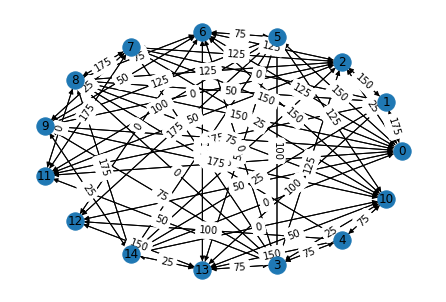

<ipython-input-196-7d87b36f009e>:85: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(matrix, last_column)[0]


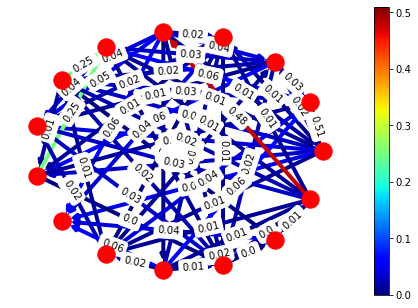

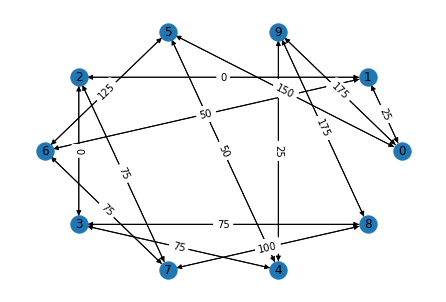

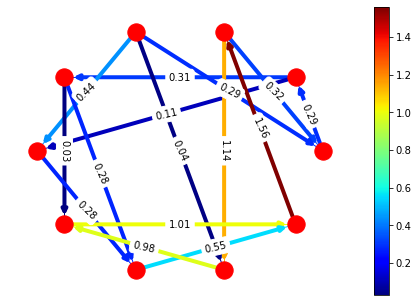

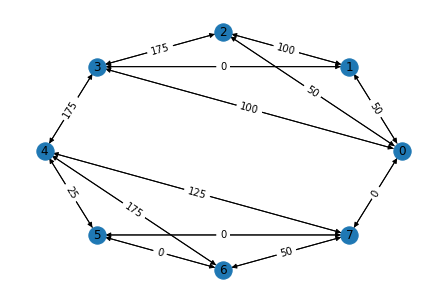

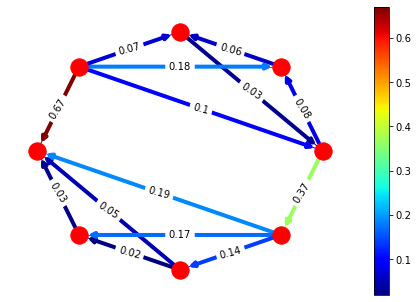

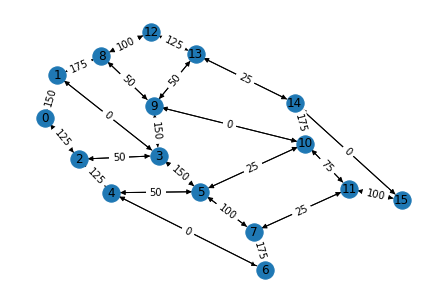

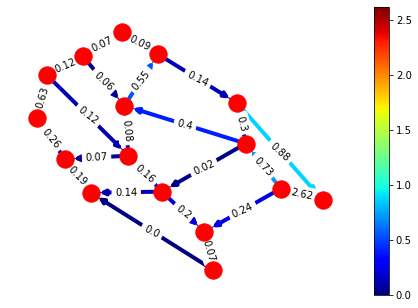

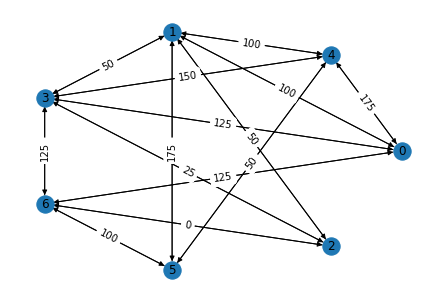

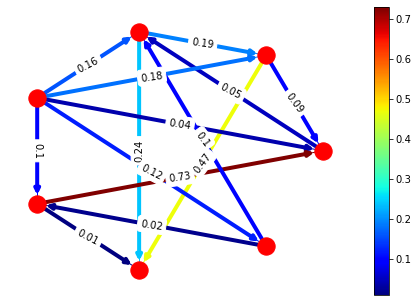

In [196]:
def read_file(file_name):
    edges = []
    with open(file_name) as file:
        for line in file:
            v1, v2, e = line.split(" ")
            edges.append((int(v1), int(v2), int(e)))
            edges.append((int(v2), int(v1), int(e)))

    sem = edges[-1]
    edges.pop(-1)
    edges.pop(-1)
    return edges, sem

def create_graph():
    for i in range(1, 6):
        edges, sem = read_file(f"graph{i}.txt")
        graph = nx.DiGraph()
        graph.add_weighted_edges_from(edges)
        if i == 4:
            layout = nx.spring_layout(graph, iterations=100, seed=39775)
        else:
            layout = nx.kamada_kawai_layout(graph)
        nx.draw(graph, layout, with_labels=True)
        nx.draw_networkx_edge_labels(graph, layout, edge_labels=nx.get_edge_attributes(graph, 'weight'))
        plt.show()

        result = kirchhoff(graph, edges, sem)

        new_graph = nx.DiGraph()
        n = len(edges)
        new_edges = []

        for i in range(0, n, 2):
            if result[i] > 0:
                new_edges.append((edges[i][0], edges[i][1], round(result[i], 2)))
            else:
                new_edges.append((edges[i][1], edges[i][0], round(-result[i], 2)))

        new_graph.add_weighted_edges_from(new_edges)
        edges, colors = zip(*nx.get_edge_attributes(new_graph, 'weight').items())
        nx.draw(new_graph, layout, edgelist=edges, node_color='r', edge_color=colors, width=4, edge_cmap=plt.cm.jet,
                vmin=min(new_edges, key=lambda item: item[2])[2], vmax=max(new_edges, key=lambda item: item[2])[2])
        nx.draw_networkx_edge_labels(new_graph, layout, edge_labels=nx.get_edge_attributes(new_graph, 'weight'))
        edges = nx.draw_networkx_edges(new_graph, layout, edge_color=colors, arrows=False, edge_cmap=plt.cm.jet)
        plt.colorbar(edges)
        plt.show()

def kirchhoff(graph, edges, sem):
    n = len(edges)
    matrix = np.zeros((3 * n, n + 1))
    edges_dict = {}

    for i, edge in enumerate(edges):
        matrix[edge[0], i] = -1
        matrix[edge[1], i] = 1
        edges_dict[(edge[0], edge[1])] = i, edge[2]

    idx = len(graph.nodes)
    for cycle in nx.simple_cycles(graph):
        k = len(cycle)
        for v in range(k):
            next_v = v + 1
            if v == k - 1:
                next_v = 0

            i = edges_dict[(cycle[v], cycle[next_v])][0]
            e = edges_dict[(cycle[v], cycle[next_v])][1]
            matrix[idx][i] = e * matrix[cycle[v]][i]

            if (sem[0], sem[1]) == (cycle[v], cycle[next_v]):
                matrix[idx][n] = sem[2]
            elif (sem[1], sem[0]) == (cycle[v], cycle[next_v]):
                matrix[idx][n] = -sem[2]
        idx += 1
        if idx > n + 1:
            break
    last_column = matrix[:, n]
    matrix = np.delete(matrix, -1, axis=1)
    return np.linalg.lstsq(matrix, last_column)[0]


def generate_2d_layout(G):
    return {(x, y): (y, -x) for x, y in G.nodes()}


def find_last_number(string):
    n = len(string) - 1
    while string[n] != " ":
        n -= 1

    return -(len(string) - n - 1)

def generate_graph():
    graph = {1: nx.gnp_random_graph(15, 0.5), 2: nx.LCF_graph(10, [5, -5], 5), 3: nx.barbell_graph(4, 0),
             4: nx.grid_2d_graph(4, 4), 5: nx.connected_watts_strogatz_graph(7, 4, 10)}
    for i in range(1, 6):
        G = graph[i]
        for (start, end) in G.edges:
            G.edges[start, end]['weight'] = random.randrange(0, 200, 25)

        nx.write_weighted_edgelist(G, f"graph{i}.txt")
        if i == 3:

            with open(f"graph{i}.txt", 'a') as outfile:
                outfile.write(f"{0} {7} {0}\n")
                outfile.write(f"{0} {7} {random.randint(200, 500)}\n")
        else:
            with open(f"graph{i}.txt", 'a') as outfile:
                outfile.write(f"{start} {end} {random.randint(200, 500)}\n")

        if i == 4:
            coord = {}
            with open(f"graph{i}.txt", 'r') as f:
                get_all = f.readlines()
            with open(f"graph{i}.txt", 'w') as file:
                k = 0
                for line in get_all:
                    node1, node2, e = line[:6], line[7:13], line[find_last_number(line):]
                    if coord.get(node1) is None:
                        coord[node1] = k
                        k += 1
                    if coord.get(node2) is None:
                        coord[node2] = k
                        k += 1
                    file.writelines(f"{coord[node1]} {coord[node2]} {e}")
        plt.show()


generate_graph()
create_graph()

Do tworzenia grafów użyłem biblioteki networkx. Dzięki niej generuje wymagane grafy i zapisuje je do plików tekstowych, a następnie je odczytuje. Zakładam że SEM podawane jest w ostatnim wierszu pliku tekstowego z grafem.
Ze względu na czytelność wygenerowałem grafy o ograniczonej liczbie wierzchołków (aby zwiększyć liczbę wierzchołków należy zmienić wartości w funkcji ```generate_graph```.
Zaimplementowałem wersję z prawem Kirchoffa, gdzie występuje nadokreślony układ równań. Użyłem funkcji ```linalg.lstsq``` która bardzo szybko rozwiązuje takie układy. W pierwszym kroku tworzenia układu równań sumuję prądy wchodzące i wychodzące z wierzchołka przyrównując je do zera.
Wczytywany jest graf nieskierowany, więc każda krawędź prowadzi w dwie strony. W trakcje obliczania, jeśli natężenie wyjdzie ujemne to kierunek prądu zamieniany jest na przeciwny.
Cykle proste wyszukiwane są za pomocą funkcji bilbiotecznej ```networkx.simple_cycles```. Korzystając z nich tworze kolejne równania w macierzy.
Wizualizacja i wyniki pokazują zamierzony efekt, np. w grafie z mostkiem największe natężenie znajduje się na mostku pomiędzy grafami.